In [6]:
import pandas as pd

adv = pd.read_csv("Advertising.csv", index_col=0)

adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
import numpy as np
# Y is a response variable
Y = sales = adv['sales']
# Antag att regression av 'TV' på 'sales' är ungefär linjär
# Y = B0 + B1 X
# sales = B0 + B1 * 'TV'
# Modellspecifikation (designmatrisen) behöver en 1:a i första kolumnen
X = TV = np.column_stack([np.ones(Y.shape[0]), adv['TV']])
X

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [8]:
# pseudo-invers för prestanda
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([7.03259355, 0.04753664])

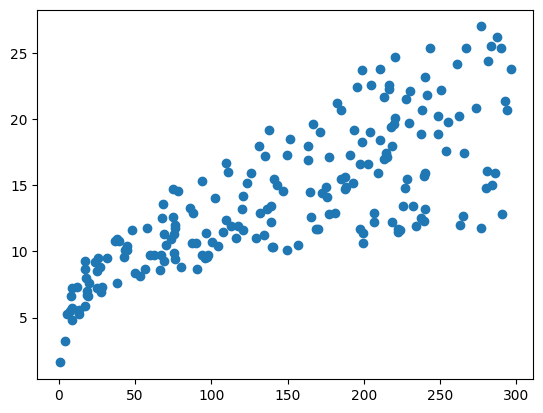

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], Y)

In [10]:
# RSS residual Sum of Squares
# SSE Sum of Square Errors
# Samma sak!
# Stickprovets storlek
n = Y.shape[0]
# antalet parametrar, bara TV i detta fall, så 1
v = X.shape[1] - 1

SSE = np.sum(np.square(Y - X @ b))
SSE

np.float64(2102.5305831313517)

In [11]:
var = SSE/(n-v-1)
S = np.sqrt(var)
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X))/n)

# Standard error (of the mean)
se = var / n

# Square of standard error of B1 = var/Sxx
se_b = var/Sxx

ci = (b[1], 2*np.sqrt(se_b))
print(f"Confidence interval on predictor B1: {ci[0]:.4f} +/- {ci[1]:.4f}")

Confidence interval on predictor B1: 0.0475 +/- 0.0055


Detta är väldigt ungefärligt  ett 90% intervall (<2sigma). Om vi kör regressionen många gånger på delmängder av datan ( som skall ha samma medel, dvs vara balanserade) så väntar vi oss att 90% av värdena hamnar mellan 0.052 och 0.042.

In [12]:
x_mean = np.mean(X[:, 1])
se_intercept = var * (1/n * (np.square(np.mean(X))/(np.sum(X-x_mean))))

In [13]:
# borde bli [6.130, 7.935]
b[0]

np.float64(7.032593549128345)

### Hypotestestning
Noll-hypotes:

$H_0$ : There is no relationship between X and Y

Alternativ hypotes:

$H_a$ : There is a relationship between X and Y

$H_0$ : beta = 0

$H_a$ : beta not 0

T-statistika nere

In [14]:
t = b[1]/se_b
t

np.float64(6303.106346188192)

Ok, så regressionen är relevant, men hur bra är den? Korrelationen eller pearsons koef. nedan

In [15]:
import scipy.stats as stats
rho = Sxy / (np.sqrt(Sxx*Syy))
Rsq = SSR/Syy
r = stats.pearsonr(X[:, 1], Y)
print(f"scipy.stats pearsonnr objekt: {r}")
print(f"scipy.stats korrelation: {r.correlation}\n sqrt(Rkvadrat): {np.sqrt(Rsq)}\n FORTSÄTT")

NameError: name 'Sxy' is not defined